In [1]:
# add conda  environment to the notebook as kernel
!python -m ipykernel install --user --name=mlops



Installed kernelspec mlops in /Users/tekrajchhetri/Library/Jupyter/kernels/mlops


In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [9]:
def load_data(path):
    df = pd.read_csv(path)
    return df

In [10]:
def clean_data(df):
    print(f"Before droping NA: {df.isna().sum()}")
    df = df.dropna()
    print(f"After droping NA: {df.isna().sum()}")
    return df    
    

In [11]:
def pre_process(df):
    #apply one hot encoding to categorical values
    categorical_columns = list(df.select_dtypes(exclude="number").columns) 
    df = pd.get_dummies(df, columns=categorical_columns, dtype=int)
    
    return df


In [12]:
def show_correlation(df):
    plt.figure(figsize=(20,15)) 
    sns.heatmap(df, annot = True)

In [13]:
def split_data(df):
    X = df.drop('median_house_value', axis=1)
    Y = df['median_house_value']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=123459)
    print(len(x_train), len(x_test), len(y_train), len(y_test))
    return x_train, x_test, y_train, y_test
    

In [14]:
def basic_training(x_train, y_train):
    basic_model = DecisionTreeRegressor(max_depth = 17)
    basic_model.fit(x_train, y_train)
    return basic_model
    

In [15]:
def eval_metrics( x, y):
    rmse = np.sqrt(mean_squared_error(x, y))
    mae = mean_absolute_error(x, y)
    r2 = r2_score(x, y) 
    print(f"R^2 Score is {r2}, RMSE is {rmse} and MAE is {mae}")
    return {
        "rmse":rmse, 
        "mae":mae, 
        "r2":r2
    }

In [16]:
def hyperparameter_tuning_model(x_train, y_train):
    hyperparameters = {
        "max_depth": [5, 10, 25],
        "criterion": ['squared_error','friedman_mse','absolute_error', 'posisson'],
        "min_samples_leaf": [2,5,10],
        "max_features": ['auto','sqrt']
    }
    dtregressor = DecisionTreeRegressor()
    tuning_model = RandomizedSearchCV(estimator=dtregressor, param_distributions=hyperparameters,
                                    n_iter=50, cv=5, random_state=65, n_jobs=4)
    tuning_model.fit(x_train, y_train)
    
    print(f"Hyperparameters: {hyperparameters}")
    print(f"Tuned hyperparameters: {tuning_model.best_params_}")
    
    #to show different tracking in MLflow
    best_params=tuning_model.best_params_
    
    max_depth = best_params['max_depth']
    criterion = best_params['criterion']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features=best_params['max_features']
    
    tuned_model = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf,
                                       max_features=max_features)
    tuned_model.fit(x_train, y_train)
    
    return tuned_model, best_params
    
    

Before droping NA: longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64
After droping NA: longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


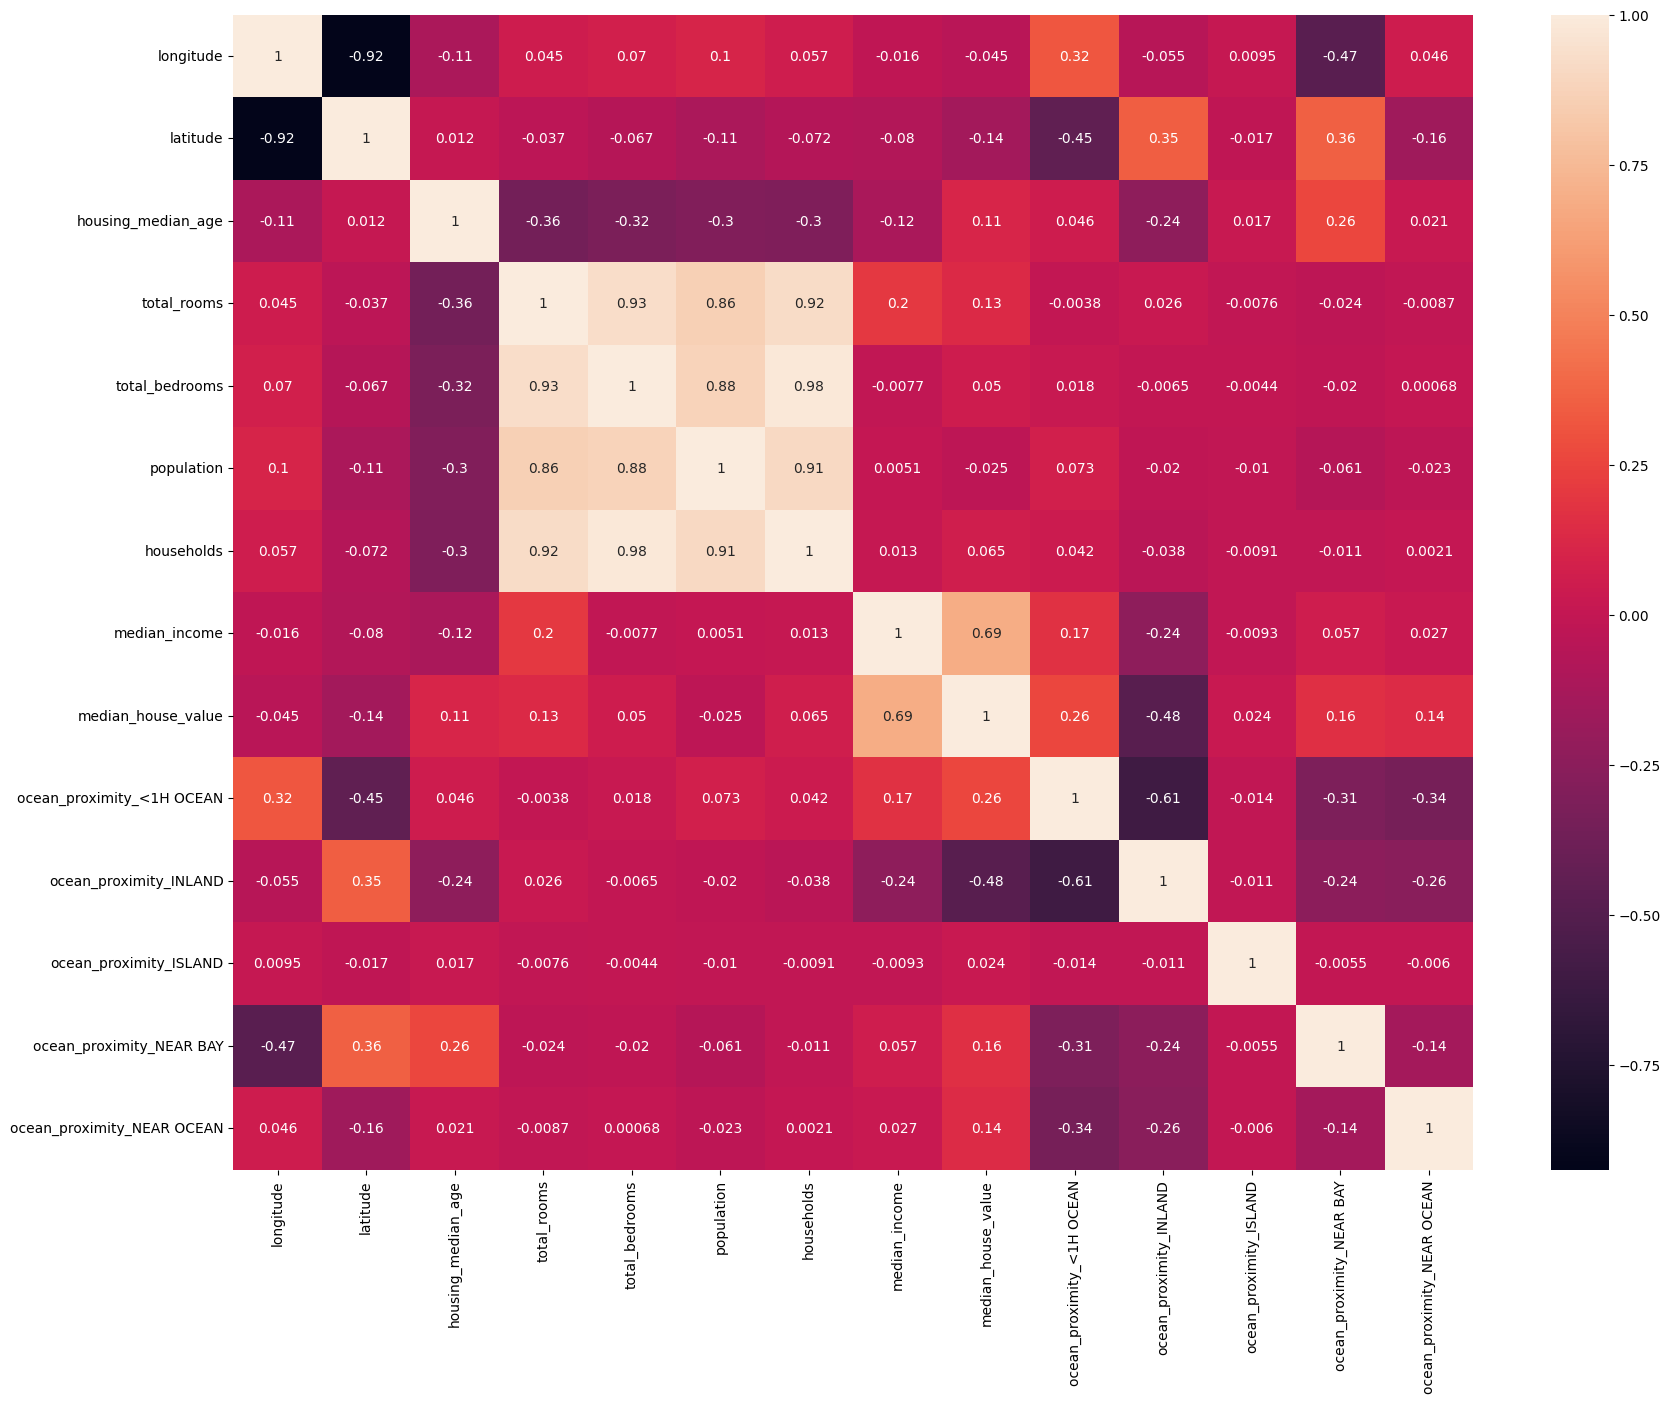

In [17]:
df = load_data("data/housing.csv")
df.head()
preprocess_Df = pre_process(df)

clean_df = clean_data(preprocess_Df) 
show_correlation(clean_df.corr())

In [18]:
x_train, x_test, y_train, y_test = split_data(clean_df)

13690 6743 13690 6743


In [19]:
basic_model = basic_training(x_train, y_train)

In [20]:
y_pred = basic_model.predict(x_test)
eval_metrics(y_test, y_pred)

R^2 Score is 0.6588316782075685, RMSE is 67901.8643972025 and MAE is 42959.082932941485


{'rmse': 67901.8643972025, 'mae': 42959.082932941485, 'r2': 0.6588316782075685}

In [21]:
tuned_model = hyperparameter_tuning_model(x_train, y_train)

/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/envs/mlflowmlops/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

Hyperparameters: {'max_depth': [5, 10, 25], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'posisson'], 'min_samples_leaf': [2, 5, 10], 'max_features': ['auto', 'sqrt']}
Tuned hyperparameters: {'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'friedman_mse'}


In [22]:
tunedmodel, hyperparams = tuned_model
y_pred = tunedmodel.predict(x_test)
eval_metrics(y_test, y_pred)



R^2 Score is 0.7356855157018529, RMSE is 59766.50097179984 and MAE is 39502.365588133966


{'rmse': 59766.50097179984,
 'mae': 39502.365588133966,
 'r2': 0.7356855157018529}

## MLflow



### MLflow tracking server using MySQL as a backend tracking store.

- Install MySQL and create the database the below command:
    `CREATE DATABASE mlflow_tracking_db;`
- Start MLflow tracking using MySQL

    `mlflow server \ --backend-store-uri mysql+pymysql://root@localhost/mlflow_tracking_db \ --default-artifact root file:/./mlruns \ -h 0.0.0.0 -p 5002`

- Set the MLflow tracking uri in code.
mlflow.set_tracking_uri(ADDRESS), default address http://localhost:5000

### MLflow tracking server using Sqlite as a backend tracking store.  
- Start MLflow tracking using Sqlite
    `mlflow server --backend-store-uri sqlite:///mlflow_v201tracking_db.db --default-artifact-root ./artifacts --host localhost --port 5000`

- Set the MLflow tracking uri in code.

    `mlflow.set_tracking_uri("http://localhost:5002")`

### Documentation
https://www.mlflow.org/docs/latest/model-registry.html#model-registry-workflows



In [26]:
import mlflow 

def create_mlflow_exp(experiment_name, run_name, run_metrics, model,run_params=None):
#     tracking using db
    mlflow.set_tracking_uri("http://127.0.0.1:5000/")
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None: 
            for param in run_params: 
                mlflow.log_param(param, run_params[param])
                
        for metric in run_metrics: 
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        
        mlflow.set_tag("tag1", "Decision Forest") 
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"}) 
        print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))
        
            
        
    

In [24]:
experiment_name = "Basic_Decision_Tree_Model" ##basic classifier
run_name="BasicDecisionTree"
y_pred = basic_model.predict(x_test) 
run_metrics = eval_metrics(y_test, y_pred)
print(run_metrics)

R^2 Score is 0.6588316782075685, RMSE is 67901.8643972025 and MAE is 42959.082932941485
{'rmse': 67901.8643972025, 'mae': 42959.082932941485, 'r2': 0.6588316782075685}


In [34]:
# error: https://github.com/mlflow/mlflow/issues/468

create_mlflow_exp(experiment_name=experiment_name, run_name=run_name,
                 run_metrics=run_metrics,model=basic_model)

Run - HyperparameterOptimizedDTModelV221-05-23 is logged to Experiment - HyperparameterOptimized_Decision_Tree_ModelV221-05-23


In [28]:
experiment_name = "HyperparameterOptimized_Decision_Tree_ModelV2"+ str(datetime.now().strftime("%d-%m-%y"))
run_name="HyperparameterOptimizedDTModelV2"+ str(datetime.now().strftime("%d-%m-%y"))
y_pred = tunedmodel.predict(x_test)
run_metrics = eval_metrics(y_test, y_pred)
print(run_metrics)

R^2 Score is 0.7356855157018529, RMSE is 59766.50097179984 and MAE is 39502.365588133966
{'rmse': 59766.50097179984, 'mae': 39502.365588133966, 'r2': 0.7356855157018529}


In [35]:

create_mlflow_exp(experiment_name=experiment_name, run_name=run_name,
                 run_metrics=run_metrics,model=tunedmodel, run_params=hyperparams)

Run - HyperparameterOptimizedDTModelV221-05-23 is logged to Experiment - HyperparameterOptimized_Decision_Tree_ModelV221-05-23


## Adding MLflow Model to the Model Registry

[https://www.mlflow.org/docs/latest/model-registry.html#adding-an-mlflow-model-to-the-model-registry](https://www.mlflow.org/docs/latest/model-registry.html#adding-an-mlflow-model-to-the-model-registry)

## Method 1

- Rregister via MLflow UI after running `create_mlflow_exp(experiment_name=experiment_name, run_name=run_name,
                 run_metrics=run_metrics,model=tunedmodel, run_params=hyperparams)` 
- You can also directly register from the code that creates experiment by passing `registered_model_name` to `log_model`                  
  ![](register_model_ui.png)
  ![](run_id_ui.png)
  


In [30]:
#prediction
import mlflow
logged_model = 'runs:/65982b08ac8a493aa1f7c35bc37323b9/model'
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

loaded_model.predict(pd.DataFrame(x_test))

array([500001.        , 237757.14285714, 374209.18181818, ...,
       173990.        , 289609.09090909, 199523.07692308])

## Method 2

- Register using `mlflow.register_model()` method, after running all the experiments.

- First log the experiment and click on it (unregistered) to get the run ID.

    ![](run_id.png)
 

In [54]:
# mlflow, version 2.0.1

In [44]:

import mlflow
with mlflow.start_run(run_name=run_name) as run:
    result = mlflow.register_model(
            "runs:/d7fdbb753a474ace9d1aafd069efc39b/model",
            "HousePredictionDTMODEL1"
    )

Registered model 'HousePredictionDTMODEL1' already exists. Creating a new version of this model...
2023/05/21 20:17:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: HousePredictionDTMODEL1, version 2
Created version '2' of model 'HousePredictionDTMODEL1'.


## Method 3

If name exists, there will be error. Unique name is required

```python
from mlflow import MlflowClient
client = MlflowClient()
result = client.create_model_version(
    name="name",
    source="PATH", # e.g.: mlruns/2/b819fa8c760b401a99dc7c75c4c6bf9e/artifacts/model
    run_id="", #e.g.: b819fa8c760b401a99dc7c75c4c6bf9e
)
```

In [37]:
from mlflow.tracking.client import MlflowClient
client = MlflowClient()

In [38]:
client.create_registered_model("method3-createmodel")

<RegisteredModel: creation_timestamp=1684692641360, description='', last_updated_timestamp=1684692641360, latest_versions=[], name='method3-createmodel', tags={}>

In [45]:
client = MlflowClient()
result = client.create_model_version(
    name="method3-createmodel",
    source="artifacts/2/d7fdbb753a474ace9d1aafd069efc39b/artifacts/model",
    run_id="d7fdbb753a474ace9d1aafd069efc39b"
)

2023/05/21 20:17:25 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: method3-createmodel, version 2


![](register_m3.png)
## Versions of models
![](versions.png)
# Fetching model

In [43]:
import mlflow.pyfunc

model_name = "method3-createmodel"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

model.predict(x_test)

array([500001.        , 237757.14285714, 374209.18181818, ...,
       173990.        , 289609.09090909, 199523.07692308])

## Transitioning stage of model
- It can also be done via UI

In [46]:
client = MlflowClient()
client.transition_model_version_stage(
    name="method3-createmodel",
    version=2,
    stage="Production"
)

<ModelVersion: creation_timestamp=1684693045983, current_stage='Production', description='', last_updated_timestamp=1684693190382, name='method3-createmodel', run_id='d7fdbb753a474ace9d1aafd069efc39b', run_link='', source='artifacts/2/d7fdbb753a474ace9d1aafd069efc39b/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='2'>

![](staging.png)

### Accessing production model and making prediction

In [49]:
import mlflow.pyfunc

model_name = "method3-createmodel"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(x_test)
print(y_pred)

[500001.         237757.14285714 374209.18181818 ... 173990.
 289609.09090909 199523.07692308]


## Serving

set MLFLOW_TRACKING_URI in linux/mac use code below
`export MLFLOW_TRACKING_URI=http://localhost:5000` 

In [58]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

# expose endpoint for serving

- Run the following in terminal

    `mlflow models serve --model-uri models:/method3-createmodel/Production -p 1234 --no-conda`

![](server.png)

In [63]:
import requests

inference_request = {
        "dataframe_records": [[-1.22470e+02,  3.77300e+01,  5.00000e+01,  1.65300e+03,
         2.52000e+02,  6.41000e+02,  2.24000e+02,  1.06605e+01,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00]]
}

endpoint = "http://localhost:5008/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

{"predictions": [500001.0]}


In [65]:
# Batch prediction
import requests
lst = x_test.values.tolist()
inference_request = {
        "dataframe_records": lst
}
endpoint = "http://localhost:5008/invocations"
response = requests.post(endpoint, json=inference_request)
print(response.text)

{"predictions": [500001.0, 237757.14285714287, 374209.1818181818, 156364.2857142857, 455560.5, 243094.73684210525, 198170.58823529413, 106245.45454545454, 214700.0, 184255.55555555556, 382460.1, 124784.21052631579, 203590.9090909091, 441410.2, 308453.8461538461, 90275.0, 101836.84210526316, 276320.0, 174990.9090909091, 131469.23076923078, 161480.0, 322811.1111111111, 302107.6923076923, 451073.1818181818, 84640.0, 127792.85714285714, 144760.0, 244863.63636363635, 492737.1818181818, 148381.81818181818, 167482.35294117648, 423774.05263157893, 173466.66666666666, 235900.0, 389890.1, 286400.0, 190230.0, 122087.5, 176969.23076923078, 72636.36363636363, 108694.38888888889, 403228.85714285716, 245000.0, 299741.6666666667, 235433.33333333334, 65527.27272727273, 280500.0, 243494.11764705883, 110816.66666666667, 190230.0, 141488.23529411765, 107890.0, 270683.4166666667, 185835.7142857143, 108350.0, 131660.0, 215940.0, 108644.44444444444, 126060.0, 224185.7142857143, 304753.92307692306, 256938.461